# **Basic Set up**

In [1]:
!pip install scikit-plot

In [2]:
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import scikitplot as skplt
import keras
import numpy as np

In [3]:
#load the models first

yaml_file = open('seq2seq_model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
seq2seq = keras.models.model_from_yaml(loaded_model_yaml)
# load weights into new model
seq2seq.load_weights("seq2seq_model.h5")
print("Loaded model from disk")


with open("seq2seq_trainHistoryDict.pkl",'rb') as f:
  seq2seq_history = pickle.load(f)
print(seq2seq_history)

Loaded model from disk
{'loss': [3.3646702766418457, 1.950926423072815, 1.8054699897766113, 1.723266839981079, 1.681729793548584, 1.6449830532073975, 1.5979918241500854, 1.5355304479599, 1.4782923460006714, 1.4379884004592896, 1.4028778076171875, 1.3714683055877686, 1.342997431755066, 1.3162928819656372, 1.2910420894622803, 1.2672092914581299, 1.2449352741241455, 1.2245919704437256, 1.2054696083068848, 1.1878559589385986, 1.1718894243240356, 1.1564310789108276, 1.1423879861831665, 1.128811001777649, 1.115358829498291], 'val_accuracy': [0.6553888916969299, 0.6553888916969299, 0.6553888916969299, 0.6553888916969299, 0.6561129689216614, 0.6649276614189148, 0.6764734387397766, 0.6848092079162598, 0.6935896873474121, 0.7000324726104736, 0.7065437436103821, 0.7119773626327515, 0.7158886790275574, 0.7199425101280212, 0.724349856376648, 0.7291905283927917, 0.7333242297172546, 0.735399603843689, 0.7391455769538879, 0.7425152063369751, 0.7450523972511292, 0.7476010322570801, 0.7498874068260193, 

In [5]:
#load the models first

bin_yaml_file = open('binary_model.yaml', 'r')
bin_loaded_model_yaml = bin_yaml_file.read()
bin_yaml_file.close()
binary = keras.models.model_from_yaml(bin_loaded_model_yaml)
# load weights into new model
binary.load_weights("binary_model.h5")
print("Loaded model from disk")

with open("binary_trainHistoryDict.pkl",'rb') as f:
  binary_history = pickle.load(f)
print(binary_history)

Loaded model from disk
{'loss': [0.6949927806854248, 0.6933497786521912, 0.6932594776153564, 0.6932492852210999, 0.6934539079666138, 0.6932142376899719, 0.6932417750358582, 0.6932481527328491, 0.6931566596031189, 0.6932199597358704, 0.6931418776512146, 0.6932081580162048, 0.6932455897331238, 0.6930902004241943, 0.6932033896446228, 0.6931066513061523, 0.6932083368301392, 0.6931549906730652, 0.6930554509162903, 0.6931227445602417, 0.6931360960006714, 0.6931123733520508, 0.6931613683700562, 0.693151593208313, 0.6931980848312378], 'val_accuracy': [0.5048443675041199, 0.5046976208686829, 0.5044040083885193, 0.5060188174247742, 0.5052847862243652, 0.5061655640602112, 0.5049911737442017, 0.5052847862243652, 0.5048443675041199, 0.506312370300293, 0.5048443675041199, 0.5051379799842834, 0.5049911737442017, 0.5055783987045288, 0.5055783987045288, 0.505431592464447, 0.5064591765403748, 0.505431592464447, 0.5048443675041199, 0.5049911737442017, 0.5055783987045288, 0.5052847862243652, 0.50528478622

In [6]:
with open("y_pred.pkl",'rb') as pred:
  y_pred = pickle.load(pred)

with open("y_true.pkl",'rb') as true:
  y_true = pickle.load(true)

print(len(y_true))
print(len(y_pred))

1000
1000


In [8]:
EPOCHS = 25

# **Seq2Seq Plots**

1. Loss Plot
2. Acc Plot
3. Test Acc,Loss (already in the terminal output)

Text(0.5, 1.0, 'Loss for Seq2Seq')

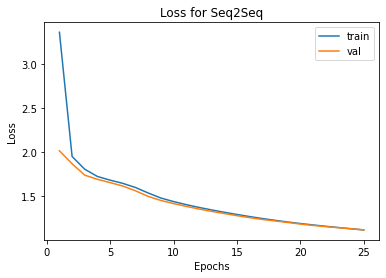

In [9]:
plt.plot(list(range(1,EPOCHS+1)),seq2seq_history['loss'],label='train')
plt.plot(list(range(1,EPOCHS+1)),seq2seq_history['val_loss'],label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss for Seq2Seq")

Text(0.5, 1.0, 'Accuracy for Seq2Seq')

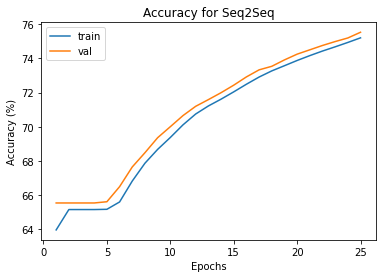

In [10]:
plt.plot(range(1,EPOCHS+1),np.array(seq2seq_history['accuracy'])*100.00,label='train')
plt.plot(range(1,EPOCHS+1),np.array(seq2seq_history['val_accuracy']) * 100.0,label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy for Seq2Seq")

# **Binary Model Plots**

1. Loss Plot
2. Acc Plot
3. ROC Plot
4. PR plot
5. F1 score report

In [11]:
from collections import Counter
print(dict(Counter(y_true)))

{0: 485, 1: 515}


In [12]:
y_pred

array([[0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.5046113 ],
       [0.504

Text(0.5, 1.0, 'Loss for Binary Classifier')

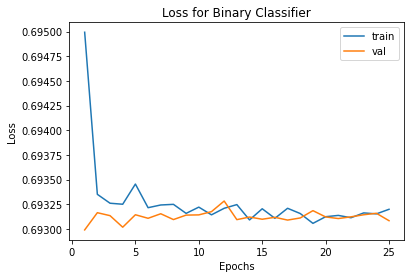

In [13]:
plt.plot(list(range(1,EPOCHS+1)), binary_history['loss'],label='train')
plt.plot(list(range(1,EPOCHS+1)),binary_history['val_loss'],label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss for Binary Classifier")

Text(0.5, 1.0, 'Accuracy for Binary Classifier')

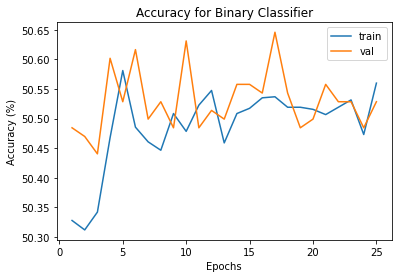

In [14]:
plt.plot(list(range(1,EPOCHS+1)), np.array(binary_history['accuracy'])*100.00,label='train')
plt.plot(list(range(1,EPOCHS+1)),np.array(binary_history['val_accuracy'])*100.00,label = 'val')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy for Binary Classifier")

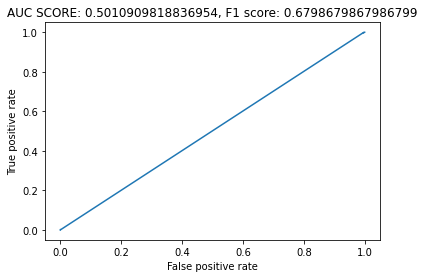

In [15]:
fpr, tpr, _ = roc_curve(y_true, y_pred)
auc_roc = roc_auc_score(y_true,y_pred) 
y_pred_f1 = y_pred > 0.5 #Basic threshold
f1 = f1_score(y_true,y_pred_f1)
plt.plot(fpr, tpr)
plt.title(f"AUC SCORE: {auc_roc}, F1 score: {f1}")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

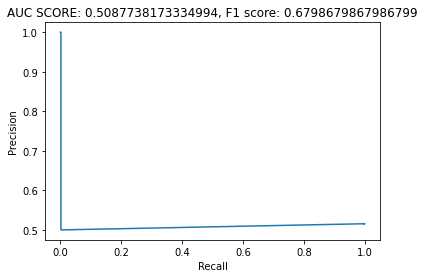

In [16]:
precision, recall, _ = precision_recall_curve(y_true, y_pred)
auc_roc = auc(recall,precision) 
y_pred_f1 = y_pred > 0.5 #Basic threshold
f1 = f1_score(y_true,y_pred_f1)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"AUC SCORE: {auc_roc}, F1 score: {f1}")
plt.show()

<Figure size 432x288 with 0 Axes>

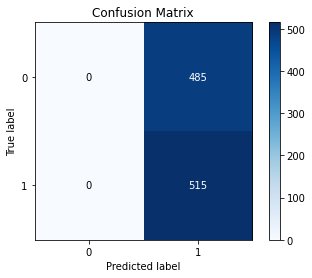

In [17]:
y_pred_f1 = y_pred > 0.5 #Basic threshold
plt.figure()
skplt.metrics.plot_confusion_matrix(y_true,y_pred_f1)
plt.show()